# Markov-Chain Monte-Carlo

- Markov Chain: A series of events $X_t$, where $X_t$ is at most dependent on $X_{t-1}$
- Monte Carlo: A simulation where one uses randomness to simulate outcomes

## A simple exmple: Calculate $\pi$

In [7]:
from numpy.random import uniform
import matplotlib.pyplot as plt

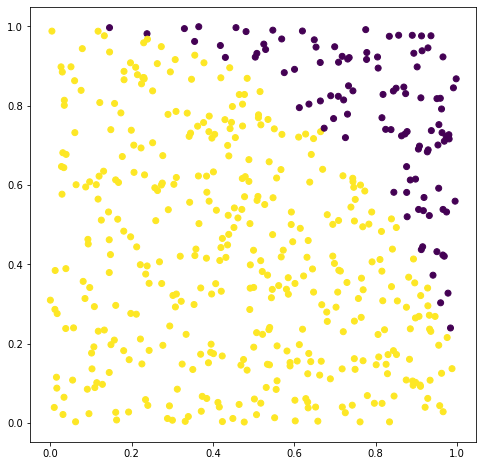

In [18]:
x, y = uniform(0, 1, 500), uniform(0, 1, 500)
with plt.rc_context({'figure.figsize': (8, 8)}):
    plt.scatter(x, y, c=x**2 + y**2 < 1)

In [19]:
(x**2 + y**2 < 1).mean()

0.788

In [20]:
from numpy import pi, linspace

In [32]:
ns = linspace(500, 10_000_000, 100).astype(int)
samples = [abs(4*((uniform(0, 1, (n, 2))**2).sum(axis = 1) < 1).mean() - pi)
    for n in ns]

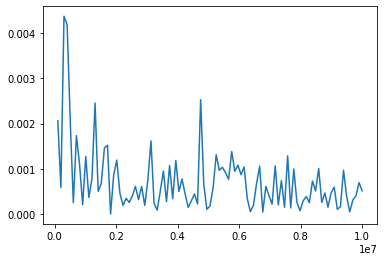

In [36]:
plt.plot(ns[1:], samples[1:])

## What is it good for?

E.g. evaluating complicated integrals:

$\int f(x) p(x) dx \approx 1/N \sum_x p(x)$

... with a special trick: Metropolis-Hastings

### But let's start with an example: Hard disk failure rate

In [49]:
from numpy import array, exp

In [276]:
N = array([400, 300, 100])
failed = array([5, 2, 2])

In [277]:
(failed/N).mean() # naive estimate

0.013055555555555556

In [278]:
from scipy import stats

In [279]:
stats.binom.logpmf(failed, N, 0.11)

array([-31.92249527, -28.4305482 ,  -7.32772096])

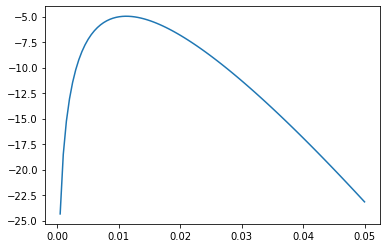

In [281]:
xs = linspace(0.0, 0.05, 100)
plt.plot(xs, [stats.binom.logpmf(failed, N, l).sum() for l in xs])

In [282]:
from numpy.random import normal

In [283]:
import numpy

In [299]:
guesses = [0.1]
accept = []
alpha = 0.003
for _ in range(20000):
    x = guesses[-1]
    xp = x + normal(0, alpha)
    a = stats.binom.logpmf(failed, N, xp).sum() - stats.binom.logpmf(failed, N, x).sum()
    if numpy.log(uniform(0, 1)) <= a:
        guesses.append(xp)
        accept.append(1)
    else:
        guesses.append(x)
        accept.append(0)

In [300]:
numpy.mean(accept)

0.7509

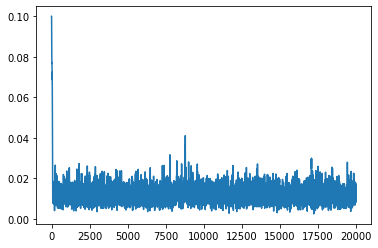

In [301]:
plt.plot(guesses)

## And now: Crypto!

In [302]:
import pandas

In [365]:
bigraphs = pandas.read_csv("bigraphs.csv", sep='\s+', index_col=0)

In [368]:
bigraphs = bigraphs.replace(0.0, 1e-8)

In [320]:
import string
import random

In [331]:
az = string.ascii_lowercase + ' '
key = {k: v for k, v in zip(az, random.sample(az, len(az)))}

In [332]:
key

{'a': 'r',
 'b': 'a',
 'c': 'v',
 'd': 'u',
 'e': 'i',
 'f': 's',
 'g': ' ',
 'h': 'b',
 'i': 'q',
 'j': 'y',
 'k': 'k',
 'l': 'l',
 'm': 'z',
 'n': 'n',
 'o': 'h',
 'p': 'x',
 'q': 'f',
 'r': 'j',
 's': 't',
 't': 'o',
 'u': 'p',
 'v': 'e',
 'w': 'd',
 'x': 'w',
 'y': 'm',
 'z': 'c',
 ' ': 'g'}

In [334]:
text = """At first, Grendel's mother prevails, and Hrunting proves incapable of hurting her; she throws Beowulf to the ground and, sitting astride him, tries to kill him with a short sword, but Beowulf is saved by his armour. Beowulf spots another sword, hanging on the wall and apparently made for giants, and cuts her head off with it. Travelling further into Grendel's mother's lair, Beowulf discovers Grendel's corpse and severs his head with the sword. Its blade melts because of the monster's "hot blood", leaving only the hilt. Beowulf swims back up to the edge of the lake where his men wait."""

In [342]:
cypher = "".join(key[c] for c in text.lower().translate(str.maketrans("","", string.punctuation)))

In [343]:
cypher

'rogsqjtog jinuiltgzhobijgxjierqltgrnugbjpnoqn gxjheitgqnvrxralighsgbpjoqn gbijgtbigobjhdtgaihdplsgohgobig jhpnugrnugtqooqn grtojquigbqzgojqitgohgkqllgbqzgdqobgrgtbhjogtdhjugapogaihdplsgqtgtreiugamgbqtgrjzhpjgaihdplsgtxhotgrnhobijgtdhjugbrn qn ghngobigdrllgrnugrxxrjinolmgzruigshjg qrnotgrnugvpotgbijgbirughssgdqobgqogojreillqn gspjobijgqnohg jinuiltgzhobijtglrqjgaihdplsguqtvheijtg jinuiltgvhjxtigrnugtieijtgbqtgbirugdqobgobigtdhjugqotgalruigzilotgaivrptighsgobigzhntoijtgbhogalhhuglireqn ghnlmgobigbqlogaihdplsgtdqztgarvkgpxgohgobigiu ighsgobiglrkigdbijigbqtgzingdrqo'

In [345]:
bigraphs.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'SPACE'],
      dtype='object')

In [373]:
bigraphs = bigraphs.rename(columns={'SPACE': ' '}, index={'SPACE': ' '}).apply(log)

In [356]:
from numpy import log

In [350]:
from functools import reduce
from operator import ad

In [412]:
def logp(key, cypher):
    return sum(bigraphs[key[j]][key[i]] for i, j in zip(cypher, cypher[1:]))

In [413]:
logp(key, cypher)

-3836.1995325904636

In [419]:
guesses = [{k: v for k, v in zip(az, az)}]
accept = []
for _ in range(5000):
    x = guesses[-1]
    xp = x.copy()
    a, b = random.sample(az, 2)
    xp[a], xp[b] = xp[b], xp[a]
    #print(a, b, x, xp)
    a = logp(xp, cypher) - logp(x, cypher)
    if numpy.log(uniform(0, 1)) <= a:
        guesses.append(xp)
        accept.append(1)
    else:
        guesses.append(x)
        accept.append(0)

In [420]:
numpy.mean(accept)

0.03

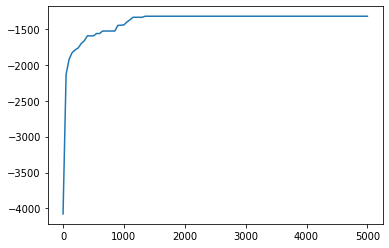

In [427]:
plt.plot(list(range(0, len(guesses), 50)), [logp(k, cypher) for k in guesses[::50]])

In [422]:
"".join(guesses[-1][k] for k in cypher)

'at first grendels mother prevails and hrunting proves incapable of hurting her she throws beowulf to the ground and sitting astride him tries to kill him with a short sword but beowulf is saved by his armour beowulf spots another sword hanging on the wall and apparently made for giants and cuts her head off with it travelling further into grendels mothers lair beowulf discovers grendels corpse and severs his head with the sword its blade melts because of the monsters hot blood leaving only the hilt beowulf swims back up to the edge of the lake where his men wait'

In [426]:
"".join(guesses[-20][k] for k in cypher)

'at first grendels mother prevails and hrunting proves incapable of hurting her she throws beowulf to the ground and sitting astride him tries to kill him with a short sword but beowulf is saved by his armour beowulf spots another sword hanging on the wall and apparently made for giants and cuts her head off with it travelling further into grendels mothers lair beowulf discovers grendels corpse and severs his head with the sword its blade melts because of the monsters hot blood leaving only the hilt beowulf swims back up to the edge of the lake where his men wait'